In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp, sqrt, mean, floor, log10, log
from scipy.optimize import curve_fit

In [98]:
#Messprotokoll
#4.2
I = np.loadtxt('King/darks/meddarkB.txt',skiprows=1)
T = np.loadtxt('King/darks/darktemperatures.txt')
T+=273.15
Bias = np.loadtxt('King/darks/meddarkB.txt', skiprows=1)
dBias= np.loadtxt('King/darks/stddarkB.txt', skiprows=1)

#4.3
x_I, N_I = np.loadtxt('King/flats/histMasterflatI_norm.txt', unpack=True)
x_V, N_V = np.loadtxt('King/flats/histMasterflatV_norm.txt', unpack=True)

#4.4
t_I, n_I, dn_I = np.loadtxt('King/linearity/exposuretimes.txt'), np.loadtxt('King/linearity/medIfinal.txt',skiprows=1), np.loadtxt('King/linearity/stdIfinal.txt',skiprows=1)
t_V, n_V, dn_V = np.loadtxt('King/linearity/exposuretimesV.txt'), np.loadtxt('King/linearity/medflatVall_norm.txt',skiprows=1), np.loadtxt('King/linearity/stdflatVall_norm.txt',skiprows=1)

#4.5
d2_r = np.loadtxt('King/sensitivity/readoutnoise2.txt', skiprows=1)
d2_t = np.loadtxt('King/sensitivity/totalnoise2.txt', skiprows=1)
N_6 = np.loadtxt('King/sensitivity/PRNUSignal.txt', skiprows=1)
d2_d = np.loadtxt('King/sensitivity/PrnuNoise.txt', skiprows=1)

N = np.loadtxt('King/sensitivity/medsignal1.txt', skiprows=1)
dN= np.loadtxt('King/sensitivity/STDSignal.txt',skiprows=1)

Eg = (1.178±0.012)eV
med-Bias start: 52291 ± 3542
med-Bias end: -3.9 ± 2.0


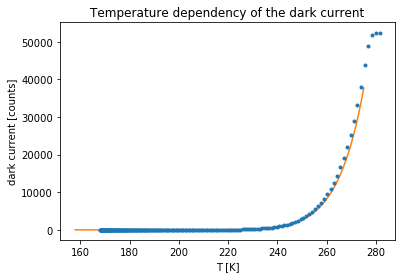

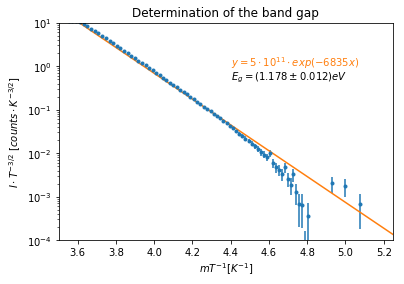

In [90]:
#4.2
k = 8.617e-5
x=np.linspace(158, 275, 1000)
x2=np.linspace(3.5e-3, 5.25e-3, 1000)
def Int1(t, c, Eg):
    return c*t**(3/2)*exp(-Eg/(2*k*t))
def Int2(t, c, Eg):
    return c*exp(-Eg*t/(2*k))

plt.figure()
plt.errorbar(T, I, yerr=sqrt(abs(I)), fmt='.')
popt, pcov = curve_fit(Int1, T, I, sigma=sqrt(abs(I)), p0=[7e11, 1.18])

plt.plot(x,Int1(x, *popt))
plt.title('Temperature dependency of the dark current')
plt.xlabel('T [K]')
plt.ylabel('dark current [counts]')
plt.savefig('diag1.pdf', format='PDF')

plt.figure()
plt.errorbar(1/T*1e3, I*T**(-3/2), yerr=sqrt(abs(I))*T**(-3/2), fmt='.')
popt2, pcov2 = curve_fit(Int2, 1/T, I*T**(-3/2), sigma=sqrt(abs(I))*T**(-3/2), p0=[1e10, 1.2])
plt.plot(x2*1e3,Int2(x2, *popt2))

Eg = round(popt2[1],3)
dEg= round(sqrt(pcov2[1,1]), 3)
co = popt2[0]

plt.annotate(r'$y={} \cdot 10^{{{}}} \cdot exp(-{}x)$'.format(int(round(co/10**floor(log10(co)), 2)), int(floor(log10(co))), int(floor(round(Eg/2/k)))), (4.4, 1), color='C1')
plt.annotate('$E_g = ({} \pm {})eV$'.format(Eg, dEg), (4.4,0.5))
plt.yscale('log')
plt.xlim(3.5, 5.25)
plt.ylim(1e-4, 10)
plt.title('Determination of the band gap')
plt.xlabel('$mT^{-1}$[$K^{-1}$]')
plt.ylabel(r'$I \cdot T^{-3/2}$ [$counts \cdot K^{-3/2}$]')
plt.savefig('diag2.pdf', format='PDF')


print('Eg = ({}±{})eV'.format(Eg, dEg))
print('med-Bias start: {} ± {}'.format(int(round(Bias[0])), int(round(dBias[0]))))
print('med-Bias end: {} ± {}'.format(round(Bias[-1], 1), round(dBias[-1], 1)))

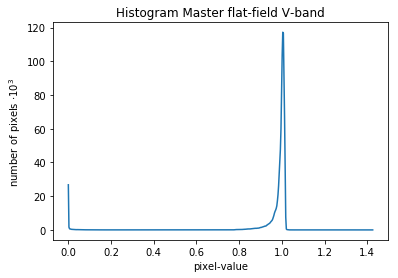

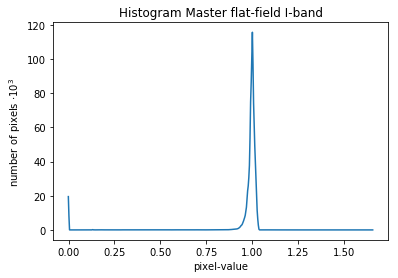

In [91]:
#4.3
plt.figure()
plt.errorbar(x_V, N_V/1e3)
plt.title('Histogram Master flat-field V-band')
plt.xlabel('pixel-value')
plt.ylabel('number of pixels $\cdot 10^3$')
plt.savefig('histogram_V.pdf', format='PDF')


plt.figure()
plt.errorbar(x_I, N_I/1e3)
plt.title('Histogram Master flat-field I-band')
plt.xlabel('pixel-value')
plt.ylabel('number of pixels $\cdot 10^3$')
plt.savefig('histogram_I.pdf', format='PDF')

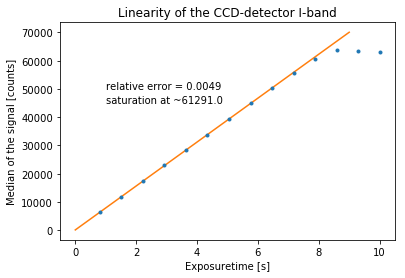

In [92]:
#4.4
plt.figure()
def lin(x, m, b):
    return m*x+b

x3 = np.linspace(0, 9, 100)
plt.errorbar(t_I[1::], n_I, sqrt(dn_I), fmt='.') ### sqrt(dn_I)???
popt3, pcov3 = curve_fit(lin, t_I[1::], n_I, sigma=dn_I)
plt.plot(x3, lin(x3, *popt3))
plt.annotate('relative error = {}'.format(round(sqrt(pcov3[0,0])/popt3[0], 4)), (1, 50e3))
plt.annotate('saturation at ~{}'.format(round(mean(n_I[9:]))), (1, 45e3))
plt.title('Linearity of the CCD-detector I-band')
plt.xlabel('Exposuretime [s]')
plt.ylabel('Median of the signal [counts]')
plt.savefig('liniarity_I.pdf', format='PDF')

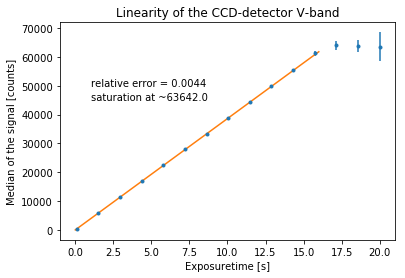

In [93]:
######### WATCHOUT: t_V hat jeden Wert dreimal hintereinander, deswegen t_V[::3] #########
plt.figure()
x4 = np.linspace(0, 16, 100)
plt.errorbar(t_V[::3], n_V, dn_V, fmt='.') ###sqrt() hier evtl besser? Sonst sehr komisch 
popt4, pcov4 = curve_fit(lin, t_V[::3], n_V[::], sigma=dn_V[::])
plt.plot(x4, lin(x4, *popt4))
plt.annotate('relative error = {}'.format(round(sqrt(pcov4[0,0])/popt4[0], 4)), (1, 50e3))
plt.annotate('saturation at ~{}'.format(round(mean(n_V[-2:]))), (1, 45e3))
plt.title('Linearity of the CCD-detector V-band')
plt.xlabel('Exposuretime [s]')
plt.ylabel('Median of the signal [counts]')
plt.savefig('liniarity_V.pdf', format='PDF')

In [94]:
len(t_V)

45

die Fehler:
d_e = 13.5
d_r = 15.6
d_PRNU = 16.7


kappa via (19), with $\eta$ = 0.9: 83.8219147671 +- 7.43690241735
kappa via (23) via fit 82.7490691795 +- 0.964889677499


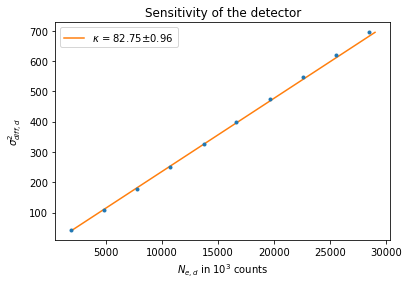

In [106]:
##### 4.5
#photon noise
d2_e =np.sqrt(np.abs(d2_t**2-d2_r**2-d2_d**2))

d_e = sqrt(mean(d2_e))

#read-out noise
d_r = sqrt(mean(d2_r))

#PRNU noise
d2_PRNU = np.abs(d2_t-d2_e-d2_r)
d_PRNU = sqrt(mean(d2_PRNU))

print('die Fehler:')
print('d_e = {}'.format(round(d_e, 1)))
print('d_r = {}'.format(round(d_r, 1)))
print('d_PRNU = {}'.format(round(d_PRNU, 1)))
print()

def kap(n, div):
    return n/(div/2 - mean(d2_r))

plt.errorbar(N, dN,fmt='.')

x_test = np.linspace(2000, 29e3, 200)

popt_t, pcov_t = curve_fit(kap2, N[:6], dN[:6])
kappa2 = popt_t[1]**-1*2
dkappa2= popt_t[1]**-2*2*sqrt(pcov_t[1,1])
plt.plot(x_test, kap2(x_test, *popt_t), label='$\kappa$ = {}$\pm${}'.format(82.75, 0.96))


plt.title('Sensitivity of the detector')
plt.xlabel('$N_{e,d}$ in $10^3$ counts')
plt.ylabel('$\sigma^2_{diff,d}$')
plt.legend()

plt.savefig('sensitivity.pdf', format='PDF')

"""print('Kappa für alle Aufnahmen nach (23):')
print(kap(N, dN))
np.savetxt('kappa.txt', kap(N, dN))"""
print()

kappa1 =0.9* N/d2_e
dkappa1=0.9*np.sqrt((dN/d2_e)**2+(N*d_e/d2_e**2)**2)
print('kappa via (19), with $\eta$ = 0.9:', mean(kappa1), "+-",mean(dkappa1))
print('kappa via (23) via fit', kappa2, "+-",dkappa2)

In [108]:
d = 10**((18.4+5)/5)
dd= log(10)/5 * d * 0.1
print("distance to BS90 via isochrone fitting",round(d/1e3,1),'+-', round(dd/1e3,1),'kpc')

distance to BS90 via isochrone fitting 47.9 +- 2.2 kpc
